Jupyter Notebook by Minne Schepers

For splitting the data into males and females, and into training and test group


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df = pd.read_csv('/Users/minneschepers/Downloads/HCP_Aging_cog.csv')

Split into males and females

In [5]:
tda = pd.read_csv("/Users/minneschepers/Desktop/HCP/TDA_data/TDA_features_HCP.csv")
print(tda.shape)
tda.drop_duplicates(inplace=True)
print(tda.shape)

(724, 98)
(640, 98)


In [3]:
df.shape

(725, 41)

In [1]:
df.notnull().sum()

NameError: name 'df' is not defined

In [713]:
males = df[df['sex']=='M']
males = males.reset_index()
females = df[df['sex']=='F']
females = females.reset_index()
print(males.shape)
print(females.shape)

(319, 42)
(406, 42)


# Males

Number of rows per column in males:

In [714]:
males.notnull().sum()

index                       319
subject                     319
sex                         319
age_months                  318
age_years                   318
moca_total_score            319
years_of_education          318
fluidcog_unadjusted         258
fluidcog_age                261
fluidcog_np                 252
crystalcog_unadjusted       258
crystalcog_age              259
crystalcog_np               250
earlychildcog_unadjusted    257
earlychildcog_age           260
earlychildcog_np            251
totalcog_unadjusted         257
totalcog_age                259
totalcog_np                 250
dccs_unadjusted             259
dccs_age                    261
dccs_np                     147
deldisc_auc200              316
deldisc_auc40000            316
flanker_unadjusted          259
flanker_age                 261
flanker_np                  147
lswmt_unadjusted            260
lswmt_age                   262
lswmt_np                    147
orrt_unadjusted             260
orrt_age

<AxesSubplot:>

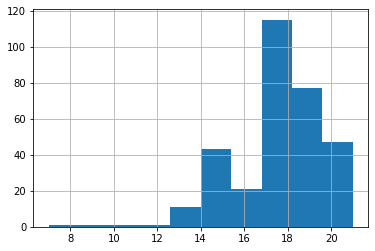

In [715]:
males['years_of_education'].hist()

<AxesSubplot:>

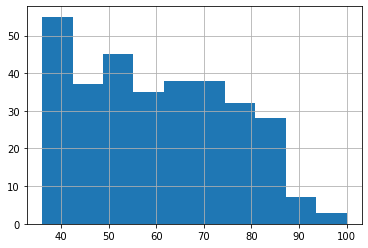

In [716]:
males['age_years'].hist()

Show correlation values between cognitive scores in males and age/education/moca scores

In [717]:
all_columns = males.columns
age_columns = [i for i in all_columns if '_age' in i]
standard_columns = ['subject', 'sex', 'age_months', 'age_years', 'moca_total_score',
       'years_of_education']

In [718]:
males_age = males[standard_columns + age_columns]

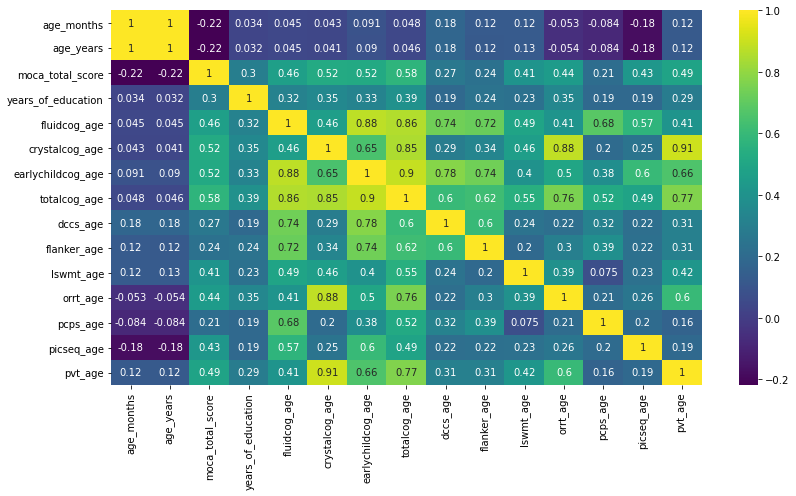

In [719]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(males_age.corr(), annot=True, cmap='viridis')
plt.tight_layout()

Split data into test part and training part

In [720]:
# Split on age_years:

# Organize data into 3 bins
bins = np.linspace(50, 100, 3)
print(bins)
y = males['age_years']
y_binned = np.digitize(y, bins)

[ 50.  75. 100.]


In [721]:
# Split on years_of_education

bins2 = np.linspace(16, 20, 3)
print(bins2)
y2 = males['years_of_education']
y_binned2 = np.digitize(y2, bins2)

[16. 18. 20.]


In [722]:
# Do not split on moca_total_score, because not enough data in dataset (insufficient nr of rows per group)

# bins3 = np.linspace(18, 30, 3)
# print(bins3)
# # Split on years_of_education
# y3 = males['moca_total_score']
# y_binned3 = np.digitize(y3, bins3)

In [723]:
y_stacked = np.vstack((y_binned, y_binned2))
y_stacked = y_stacked.T
y_stacked.shape

(319, 2)

In [724]:
# Perform split
males_train, males_test = train_test_split(males, stratify=y_binned, test_size=0.5)
print(males_train.shape)
print(males_train.shape)

(159, 42)
(159, 42)


Check nr non-nan values

In [725]:
non_nan_values = pd.DataFrame()
non_nan_values['train'] = males_train.notnull().sum()
non_nan_values['test'] = males_test.notnull().sum()
non_nan_values

,train,test
index,159,160
subject,159,160
sex,159,160
age_months,158,160
age_years,158,160
moca_total_score,159,160
years_of_education,158,160
fluidcog_unadjusted,126,132
fluidcog_age,129,132
fluidcog_np,124,128


Plot data for checking of distributions

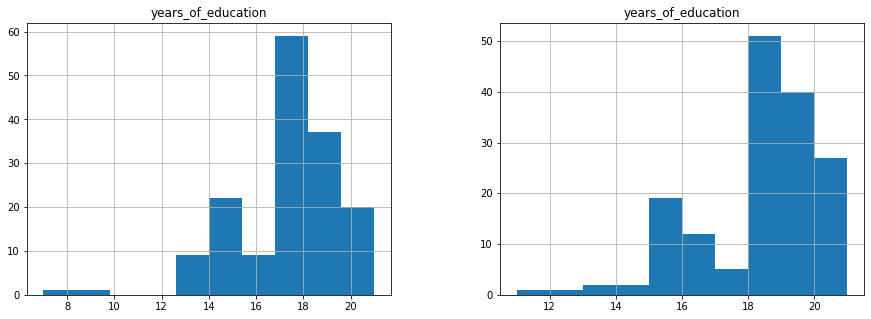

In [726]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
to_plot = 'years_of_education'
males_train.hist(to_plot, ax=axes[0])
males_test.hist(to_plot, ax=axes[1])
plt.show()

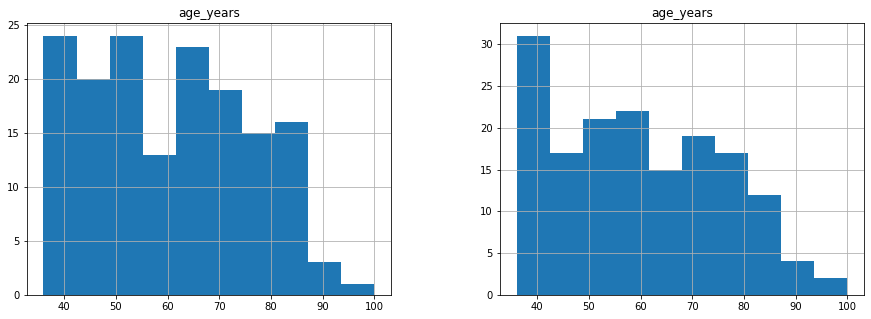

In [727]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
to_plot = 'age_years'
males_train.hist(to_plot, ax=axes[0])
males_test.hist(to_plot, ax=axes[1])
plt.show()

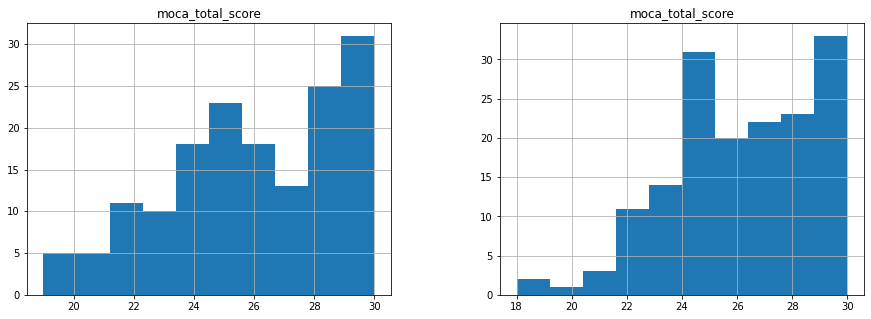

In [728]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
to_plot = 'moca_total_score'
males_train.hist(to_plot, ax=axes[0])
males_test.hist(to_plot, ax=axes[1])
plt.show()

In [729]:
# Test for significant differences between distributions
to_test = 'moca_total_score'

distr1 = males_train[to_test]
distr1 = males_test[to_test]

u_statistic, p_value = stats.mannwhitneyu(distr1, distr1)
print(f'U: {u_statistic}, \np: {p_value}')

U: 12800.0, 
p: 0.4997573234977394


Export data

In [753]:
males_train = males_train.reset_index(drop=True)
# males_train = males_train.drop(columns=['index'])

males_test = males_train.reset_index(drop=True)
# males_test = males_test.drop(columns=['index'])

In [754]:
# males_train.to_csv('/Users/minneschepers/Desktop/HCP/Behavioral_Data/Males_train.csv', index=False)
# males_test.to_csv('/Users/minneschepers/Desktop/HCP/Behavioral_Data/Males_test.csv', index=False)